<h1>Project 3: Investigate the Titanic dataset</h1>

The titanic dataset contains information about 891 passengers on board the titanic. Variables related to each passenger include their name, gender, age, ticket class, cabin, fare, where they embarked, who was with them, and if they survived.

Given this information I would like to investigate whether any variables contribute to a passenger's likelihood of survival. The question I will be using to guide my analysis of the dataset is: <b>What factors make people more likely to survive?</b>

In [264]:
# Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in csv data using Pandas' "read_csv" function
titanic = pd.read_csv('titanic-data.csv')

In [4]:
# Exploration of columns and data types
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Data Wrangling</h1>

In [269]:
# Checking to see if any values are NaNs
print titanic.isnull().values.any() # Result was True

# Digging deeper into each column for NaNs 
print titanic['Embarked'].isnull().values.any() # Result was True for Age, Cabin, and Embarked

True
False


In [270]:
# Finding the data type for Age, Cabin, and Embarked columns to determine the appropriate substitute for NaN
titanic['Embarked'].dtype


dtype('O')

In [7]:
# Handling NaNs

# Age data type = float64
# Can't replace NaN with 0 as it will affect future statistical analysis
# Calculating the total number of entries affected
print titanic['Age'].isnull().values.sum() #177 affected
print len(titanic['Age']) #891 entries in total
# As ~20% of the entries do not have a valid entry for 'Age', the data set would shrink quite a bit 
# if these entries are removed. Furthermore any vector operations or statistical analysis will ignore 
# the NaNs in the Age columns, while allowing more information to be gleaned from the other columns.
# As a result, the NaNs will be left in place. 

# Cabin data type = object
# Replacing NaNs with an empty string, and using inplace = "True" to modify the titanic dataset
titanic['Cabin'].fillna("",inplace="True") #inplace="True"
titanic.head()

# Embarked data type = object
# Replacing NaNs with an empty string, and using inplace = "True" to modify the titanic dataset
titanic['Embarked'].fillna("",inplace="True") #inplace="True"
titanic.head()

177
891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


<h1>Data Exploration</h1>

There are many factors to compare survival against. For single variable exploration I will be looking into are
Ticket Class (Pclass), Gender, Age, Number of people you were travelling with (SibSp, Parch). For multi-variable exploration I will compare ticket class & gender's effect on survival, ticket class & age's effect on survival, and gender & age's effect on survival.

Before getting started, I'll examine the data for my variables of interest.

In [383]:
# Exploring Ticket Class
print titanic.groupby('Pclass').size()
# There are roughly equal amounts of people in ticket class 1 and 2, 
# but over 2 times the amount of people in ticket class 3.

Pclass
1    216
2    184
3    491
dtype: int64


In [384]:
# Exploring Gender
print titanic.groupby('Sex').size()
# There were almost double the number of men than women

Sex
female    314
male      577
dtype: int64


In [388]:
# Exploring Age

# Group by age range. Need to determine minimum age, maximum age, and range sizes.
min_age = titanic['Age'].min() # Minimum age;
#print min_age
max_age = titanic['Age'].max() # Maximum age;
#print max_age

# The minimum age is 0.42 and the maximum age is 80. Based on this, 10 year intervals will be selected.
# Since a variation is being made to the groupby operation, the 'group_by' function is not used.
Age = titanic.groupby(pd.cut(titanic['Age'], np.arange(0, 85, 10)))

# Check to make sure pd.cut() worked as expected
'''
age_10 = 0; age_20 = 0; age_30 = 0; age_40 = 0; age_50 = 0; age_60 = 0; age_70 = 0; age_80 = 0

for i in range(0,len(titanic)):
    if titanic['Age'][i] >0. and titanic['Age'][i] <=10.0:
        age_10 += 1
    elif titanic['Age'][i] >10.0 and titanic['Age'][i] <=20.0:
        age_20 += 1
    elif titanic['Age'][i] >20.0 and titanic['Age'][i] <=30.0:
        age_30 += 1
    elif titanic['Age'][i] >30.0 and titanic['Age'][i] <=40.0:
        age_40 += 1
    elif titanic['Age'][i] >40.0 and titanic['Age'][i] <=50.0:
        age_50 += 1
    elif titanic['Age'][i] >50.0 and titanic['Age'][i] <=60.0:
        age_60 += 1
    elif titanic['Age'][i] >60.0 and titanic['Age'][i] <=70.0:
        age_70 += 1
    elif titanic['Age'][i] >70.0 and titanic['Age'][i] <=80.0:
        age_80 += 1

print age_10 ; print age_20; print age_30; print age_40; print age_50; print age_60; print age_70; print age_80
print Age.size()
'''
print Age.size()

# The largest age group was 20 - 30 year olds, followed by 30 - 40 year olds, and then 10 - 20 year olds.
# The group with the fewest number of people were those aged 70 - 80.

Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
dtype: int64


In [389]:
# Exploring Accompanying Parents and Children
print titanic.groupby('Parch').size()
# 76% passengers were not accompanied by parents or children. 
# Of the remaining 24%, majority were accompanied by 1 parent or child, followed by 2 parents or children.
# The maximum number of accompanying parents and/or children was 6.

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64


In [390]:
# Exploring Accompanying Siblings or Spouse
print titanic.groupby('SibSp').size()
# Similar to accompanying parents and children, 68% of passengers travelled without a sibling or spouse.
# The maximum number of accompanying siblings and/or spouse is 8.

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64


<h3>Single Variable Exploration</h3>

In [126]:
# Create functions that: 

# 1. Group passengers by a variable
def group_by(t_name):
    factor = titanic.groupby(t_name) # Group by variable 't_name'. e.g. Pclass, Sex, etc.
    return factor

# 2. Calculates the odds of survival as a percentage of the groups 
def survival_percent(factor):    
    factor_total = factor.size() # Total count of each group
    factor_survive = factor['Survived'].sum() # Total number of survivors in each group
    factor_percent = factor_survive/factor_total*100 # Percentage of survivors in each group
    return factor_percent

<h4>Ticket Class vs. Survival</h4>

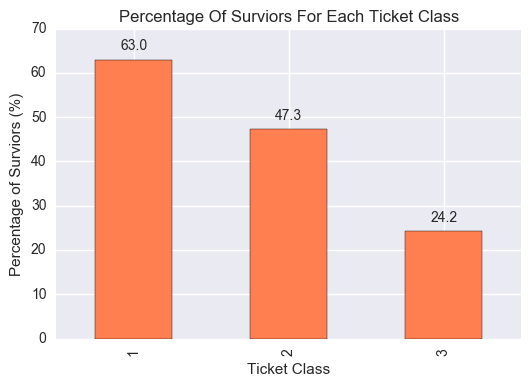

In [338]:
# Group by Ticket Class: 1, 2, 3
ticket_class = group_by('Pclass') 
# Percent of survivors in each ticket class
ticket_class_percent = survival_percent(ticket_class) 
# Bar Chart
tc = ticket_class_percent.plot(kind="bar",color='coral')
# Labels
tc.set(title = "Percentage Of Surviors For Each Ticket Class", xlabel="Ticket Class", ylabel="Percentage of Surviors (%)");
for p in tc.patches:
    tc.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

Ticket Class 1 had a 63.0% survival rate; Ticket Class 2 had a 47.3% survival rate; Ticket Class 3 had a 24.2% survival rate. Based on the chart it appears that as the ticket class increased (lower socio-economic status), fewer people survived.

<h4>Gender vs. Survival</h4>

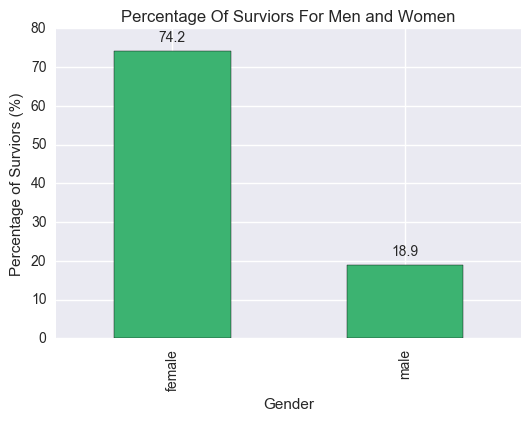

In [342]:
# Group by gender: male or female
gender = group_by('Sex') 
# Percent of men and women who survived
gender_percent = survival_percent(gender) 
# Bar Chart
g = gender_percent.plot(kind="bar",color='mediumseagreen')
# Labels
g.set(title = "Percentage Of Surviors For Men and Women", xlabel="Gender", ylabel="Percentage of Surviors (%)");
for p in g.patches:
    g.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

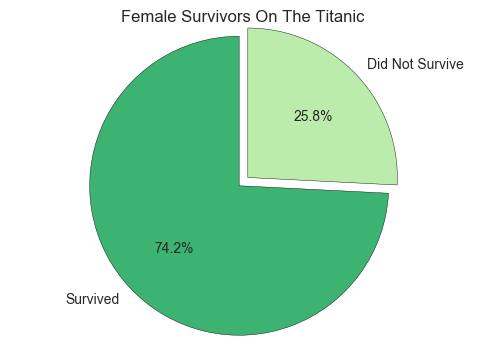

In [348]:
# Pie Chart Of Women's Survival
plt.pie([gender_percent['female'],100 - gender_percent['female']],labels=['Survived','Did Not Survive'],colors=['mediumseagreen','lightsage'],
    shadow=False, startangle=90, autopct='%1.1f%%', explode=(0,0.08));  
plt.axis('equal');
plt.title('Female Survivors On The Titanic');

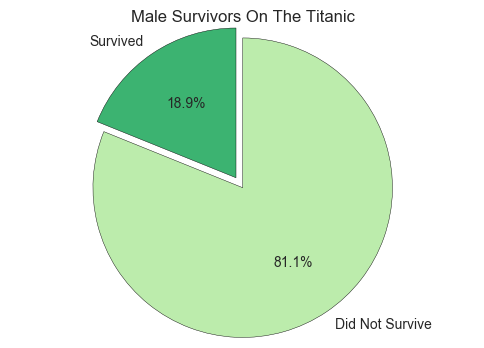

In [349]:
# Pie Chart Of Men's Survival
plt.pie([gender_percent['male'],100 - gender_percent['male']],labels=['Survived','Did Not Survive'], colors=['mediumseagreen','lightsage'], 
        shadow=False, startangle=90, autopct='%1.1f%%', explode=(0,0.08));  
plt.axis('equal');
plt.title('Male Survivors On The Titanic');

Based on the 3 charts depicting men and women's survival rate, we can see that 74.2% of the women on the Titanic survived, whereas 18.9% of the men survived. 

Even though there were ~double the amount of men on board, women still had a x4 rate of survival. It appears that women had a higher chance of surviving than men, however, this is a tentative conclusion that is not backed by rigorous statistical analysis. It is possible that women were given preference for boarding the life boats, hence the results.

<h4>Age vs. Survival</h4>

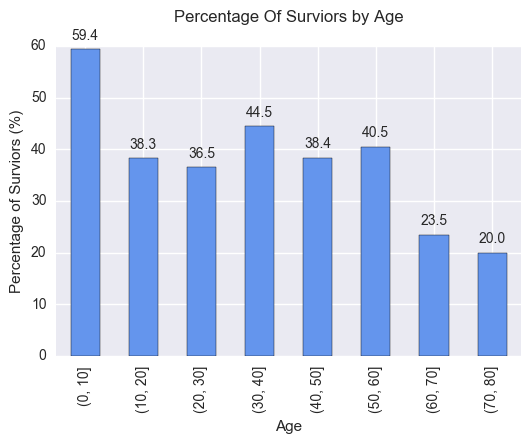

In [350]:
# Passengers were grouped by Age in increments of 10 years earlier in the analysis. 
# The same variable 'Age' will be used to calculate the percent of survivors.

# Percent of survivors
age_percent = survival_percent(Age)
# Bar Chart
a = age_percent.plot(kind="bar",color='cornflowerblue')
# Labels
a.set(title = "Percentage Of Surviors by Age\n", xlabel="Age", ylabel="Percentage of Surviors (%)");
for p in a.patches:
    a.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

The analysis of age vs. survival groups passengers into 10 year age buckets, and assesses the survival rate of each bucket. From the graph we can see that those aged 0 - 10 years old, had the highest rate of survival (59.4%). The age groups from 10 - 60 had relatively similar surivival rates, ranging from 36.5% - 44.5%. The age groups with the poorest rate of survival were those ages 60 - 80 years old. Their survival rate ranged from 20.0% - 23.5%.

The results indicate that preference was given to children (0 - 10 years old). Older folk who are les able do not appear to be given any preference as indicated by their poor rate of survival.

<h4>Number Of Accompanying Parents And Children vs. Survival</h4>

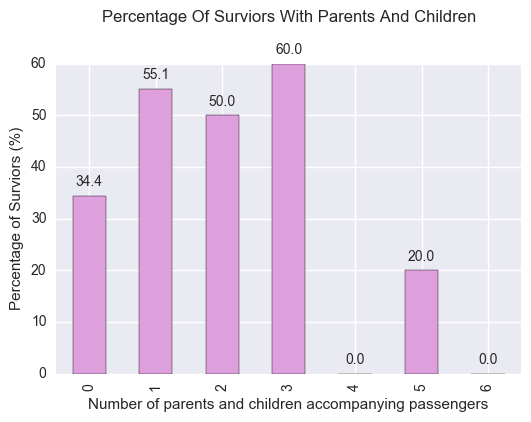

In [352]:
# Group by number of parents and children
parch = group_by('Parch') 
# Percent of survivors
parch_percent = survival_percent(parch) 
# Bar Chart
pc = parch_percent.plot(kind="bar",color = 'plum')
# Labels
pc.set(title = "Percentage Of Surviors With Parents And Children\n\n", xlabel="Number of parents and children accompanying passengers", ylabel="Percentage of Surviors (%)");
for p in pc.patches:
    pc.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

The chart indicates that passengers with 1 to 3 accompanying parents and/or children had the highest survival rates (50% - 60%), followed by passengers who had no accompanying parents and/or children. Those with 4, 5, or 6 accompanying parents and/or children had the poorest survival rates or 0%, 20%, and 0% respectively.

Initially I thought that not having any accopanying parents or children with you would result in a higher survival rate, as you only had to look out for yourself. However, when taken into consideration with the previous chart, which indicated that children aged 0 - 10 had the highest rates of survival, it is likely that the children were accompanied by a parent. Additionally, passengers that were not accompanied by parents or children made up the majority (76%), making it tougher for them to experience similar rates of survival given the finite lifeboats. As a result, passengers who had no accompanying parents and/or children did not have the highest rate of survival. 

With regards to the passengers with 4 - 6 accompanying parents and/or children, as the number of pssengers in each of those groups is so low (4, 5, and 1 respectively), there are too few data points to ascertain a proper rate of survival. 

<h4>Number Of Accompanying Spouses And Siblings vs. Survival</h4>

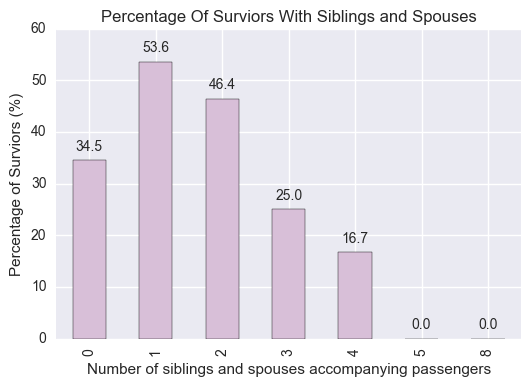

In [354]:
# Group by # of siblings or spouses
sibsp = group_by('SibSp') 
# Percent of survivors
sibsp_percent = survival_percent(sibsp) 
# Bar Chart
s = sibsp_percent.plot(kind="bar",color='thistle')
# Labels
s.set(title = "Percentage Of Surviors With Siblings and Spouses", xlabel="Number of siblings and spouses accompanying passengers", ylabel="Percentage of Surviors (%)");
for p in s.patches:
    s.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

Based on the chart above, passengers with 1 accompanying sibling or spouse had the highest survival rates, closely followed by those with 2 accompanying siblings and/or spouse. The results show an initially increasing rate of survival from 0 to 1, followed by a decrease in rates of survival from 1 onwards. 

One possible explanation for the spike at 1 sibling/spouse is that men with an accompanying female sibling or wife were more likley to survive if women and children were boarding the life boats first, and they were sticking together. Additionally, there were far higher numbers of passengers without accompanying siblings or spouses (68% of passengers), as seen in the earlier data exploration, making it tougher to have the same rate of survival for such a large group.

<h3>Multi-variable Exploration</h3>

In [136]:
# Create a new function to group by 2 variables
def group_by2(t_name1,t_name2):
    factor = titanic.groupby([t_name1,t_name2]) # Group by variable 't_name1' and 'tname2'. e.g. Pclass and Sex
    return factor

<h4>Ticket Class & Gender vs. Survival</h4>

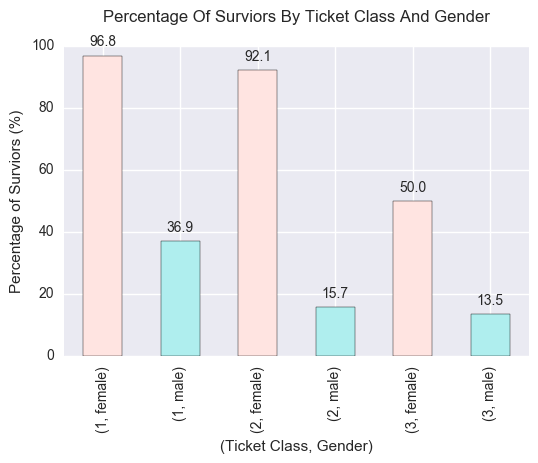

In [362]:
# Group by Ticket Class and Gender
gender_class = group_by2('Pclass','Sex') 
# Percent of survivors
gc_percent = survival_percent(gender_class) 
# Bar Chart
gc = gc_percent.plot(kind="bar",color=['mistyrose','paleturquoise'])
# Labels
gc.set(title = "Percentage Of Surviors By Ticket Class And Gender\n", xlabel="(Ticket Class, Gender)", ylabel="Percentage of Surviors (%)");
for p in gc.patches:
    gc.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

The chart depicts the same pattern for the decreasing survival rate as ticket class increases (socio-economic status decreases) for both men and women. Similarly, in each ticket class, women had a disproportionately higher rate of survival as compared to men: 96.8% for women vs 36.9% for mean in ticket class 1; 92.1% for women vs 15.7% for men in ticket class 2; 50% for women vs 13.5% for men in ticket class 3.

<h4>Ticket Class & Age vs. Survival</h4>

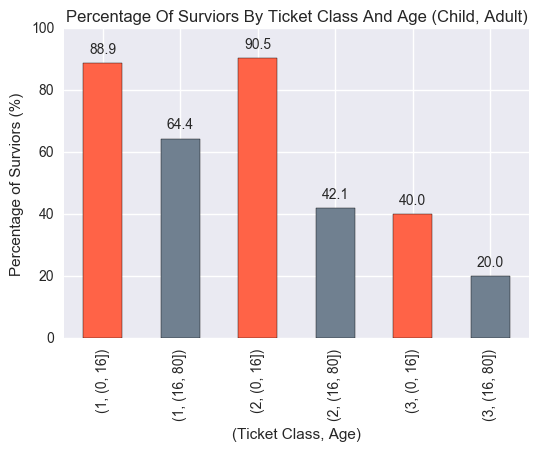

In [367]:
# Group by Ticket Class and Age (0-16 (child), 16 - 80 (adult))
ticket_age = titanic.groupby(['Pclass',pd.cut(titanic['Age'], np.array([0, 16,80]))]) 
# Percent of survivors
ta_percent = survival_percent(ticket_age)
# Bar Chart
ta = ta_percent.plot(kind="bar",color=['tomato','slategrey'])
# Labels
ta.set(title = "Percentage Of Surviors By Ticket Class And Age (Child, Adult)", xlabel="(Ticket Class, Age)", ylabel="Percentage of Surviors (%)");
for p in ta.patches:
    ta.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

The chart depicts a trend similar to the one above, where children (ages 0 - 16) have a higher rate of survival than adults (ages 16 - 80) in each ticket class. The chart also follows the ticket class pattern whereby as ticket class increases (socioeconomic status decreases), survival rate goes down for both children and adults. What's interesting to note is that women had a higher rate of survival than children when comparing this chart to the previous one. This is potentially skewed by children who were also female.

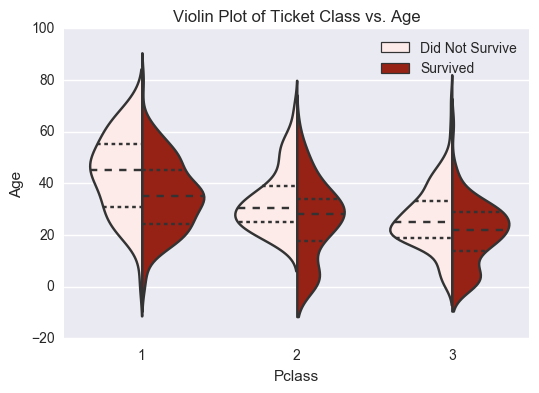

In [394]:
# Violin Plot of Ticket Class vs Age
ta_violin = sns.violinplot(x="Pclass", y="Age", hue="Survived", data= titanic, split=True, inner="quart",color='#aa1100');
sns.despine(left=True);
handles, labels = ta_violin.get_legend_handles_labels();
ta_violin.legend(handles, ["Did Not Survive","Survived"], loc='upper right');
ta_violin.set_title("Violin Plot of Ticket Class vs. Age");


The violin plot depicts the distribution of survivors by age and ticket class. In all ticket classes, the mean age for those who survived is younger than the mean age of those who did not survive. Ticket class 2 and 3 also have a bimodal distibution for those who surivived, where the second peak occurs at a much younger age (between 0 - 10). This supports the potential tendency to board children onto lifeboats first.

<h4>Gender & Age vs. Survival</h4>

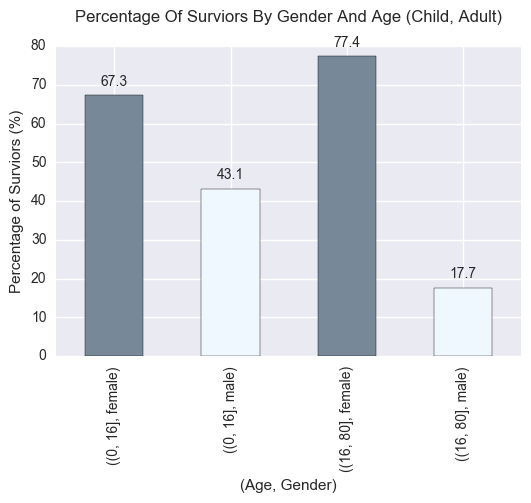

In [377]:
# Group by Gender and Age (0-16 (child), 16 - 80 (adult))
gender_age = titanic.groupby([pd.cut(titanic['Age'], np.array([0, 16,80])),'Sex'])
# Percent chance of survival
ga_percent = survival_percent(gender_age)
# Bar Chart
ga = ga_percent.plot(kind="bar",color=['lightslategrey','aliceblue'])
# Labels
ga.set(title = "Percentage Of Surviors By Gender And Age (Child, Adult)\n", xlabel="(Age, Gender)", ylabel="Percentage of Surviors (%)");
for p in ga.patches:
    ga.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points');

Once again, women have a higher rate of survival than men: 67.3% for girls vs 43.1% for boys for children (aged 0 - 16); 77.4% for women vs 17.7% for men for adults (aged 16 - 80). The gap between the survival rate of female children and the survival rate of male children is smaller than the gap between the survival rate of female adults and the survival rate of male adults. Female adults also have a higher rate of survival than female children.

This implies that female adults were much more favoured than male adults to board the lifeboats, whereas, there was less favouring of female chldren vs male children, however, both were more favoured than male adults.

<h1>Conclusion</h1>

The analysis of the Titanic dataset revealed several interesting patterns in terms of the variables that impacted the rate of survival. Factors such as ticket class, gender, age, and number of accompanying passengers were analyzed against survival. The trends that emerged were:

- As ticket class increases (from 1 to 3), the rate of survival decreases
- Women had a much higher rate of survival than men 
- Children (aged 0 - 10) had higher rates of survival as compared to older passengers
- Passengers with 1 to 3 accompanying parents and or children had the higher survival rates as compared to those with 0 or 4+ accompanying parents and/or children
- Passengers with 1 acompanying spouse/sibling had higher rates of survival than those with 0 or 2+ accompanying siblings and/or spouse

In addition to looking at single factors against survival, multiple factors were also considered to dig deper into the patterns. This included an analysis of as ticket class & age, ticket class & gender, and gender & age. The trends tha emerged were:

- A decreasing survival rate as ticket class increases (socio-economic status decreases) for both men and women. Similarly, in each ticket class, women had a higher rate of survival as compared to men.
- Children (ages 0 - 16) have a higher rate of survival than adults (ages 16 - 80) in each ticket class. As ticket class increases (socioeconomic status decreases), survival rate goes down for both children and adults.
- Women have a higher rate of survival for both children and adults. The gap between the survival rate of female children and the survival rate of male children is smaller than the gap between the survival rate of female adults and the survival rate of male adults. Female adults also have a higher rate of survival than female children.

In all the cases, the trends that emerged can point to tentative conclusions, but require deeper statistical analysis to attribute any cause to the results. That being said, on first pass it looks there are certain groups that were given preference when boarding the lifeboats. These groups include women, children, parents of children, spouses of women, and those with higher socioeconomic statuses (lower ticket classes), based on the trends in survival rates.

Overall the dataset was able to provide interesting insights into the factors that may have contributed to a passenger's survival, however, there are a few ways in which the dataset could have been improved. For example, not all of the passengers were part of the dataset. As a result, the missing passenger information could skew the results and lead to different conclusions. Furthermore, factors such as 'SibSp' and 'Parch' look at accompanying passenger information by combining two categories (siblings & spouses, parents & children) together. It would be easier to derive accompanying passenger trends (such as the affect of a spouse, elderly parents, or young children) if the categories had been recorded separately. On the whole, the available information was still sufficient to draw preliminary conclusions.

<h1>References</h1>

- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
- https://chrisalbon.com/python/matplotlib_pie_chart.html
- https://discussions.udacity.com/t/violinplot-with-titanic-data/222921/5
- https://matplotlib.org/1.5.1/examples/color/named_colors.html
- http://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
- https://matplotlib.org/examples/statistics/violinplot_demo.html